In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
437940,2020-08-16,Coffee,Georgia,13069.0,1591,32
262928,2020-06-22,Sedgwick,Kansas,20173.0,896,25
449683,2020-08-19,Lyman,South Dakota,46085.0,91,3
311739,2020-07-07,Jefferson,Tennessee,47089.0,147,1
426186,2020-08-12,Pemiscot,Missouri,29155.0,243,9
7728,2020-03-22,Cascade,Montana,30013.0,3,0
32092,2020-04-04,Belknap,New Hampshire,33001.0,17,0
190222,2020-05-29,Hemphill,Texas,48211.0,1,0
396258,2020-08-03,DeKalb,Illinois,17037.0,878,29
385091,2020-07-30,Bayamon,Puerto Rico,72021.0,1053,0


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
17507,2020-03-28,Charlottesville city,Virginia,51540.0,12,0,1.0,1.57
4338,2020-03-18,Charlottesville city,Virginia,51540.0,1,0,0.0,0.00
159961,2020-05-19,Albemarle,Virginia,51003.0,141,4,2.0,2.43
277367,2020-06-26,Charlottesville city,Virginia,51540.0,196,3,3.0,4.57
69829,2020-04-18,Albemarle,Virginia,51003.0,56,0,0.0,1.43
379258,2020-07-28,Charlottesville city,Virginia,51540.0,441,8,8.0,10.57
437196,2020-08-15,Albemarle,Virginia,51003.0,890,16,7.0,8.14
315260,2020-07-08,Albemarle,Virginia,51003.0,498,10,26.0,13.00
277346,2020-06-26,Albemarle,Virginia,51003.0,374,8,7.0,10.00
48160,2020-04-10,Charlottesville city,Virginia,51540.0,28,1,1.0,1.57


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
2326,".Cherokee County, South Carolina",57300.0,Cherokee,South Carolina
412,".Chattahoochee County, Georgia",10907.0,Chattahoochee,Georgia
745,".Marion County, Indiana",964582.0,Marion,Indiana
1561,".Perry County, Missouri",19136.0,Perry,Missouri
635,".Jefferson County, Illinois",37684.0,Jefferson,Illinois
619,".Effingham County, Illinois",34008.0,Effingham,Illinois
2816,".Rutland County, Vermont",58191.0,Rutland,Vermont
966,".Republic County, Kansas",4636.0,Republic,Kansas
2334,".Edgefield County, South Carolina",27260.0,Edgefield,South Carolina
997,".Barren County, Kentucky",44249.0,Barren,Kentucky


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
145,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
146,2020-08-14,Albemarle,Virginia,51003.0,883,16,14.0,9.43,".Albemarle County, Virginia",109330.0,8.625263
147,2020-08-15,Albemarle,Virginia,51003.0,890,16,7.0,8.14,".Albemarle County, Virginia",109330.0,7.445349
148,2020-08-16,Albemarle,Virginia,51003.0,906,16,16.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
149,2020-08-17,Albemarle,Virginia,51003.0,913,16,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
150,2020-08-18,Albemarle,Virginia,51003.0,916,16,3.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
151,2020-08-19,Albemarle,Virginia,51003.0,921,16,5.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
152,2020-08-20,Albemarle,Virginia,51003.0,930,16,9.0,8.71,".Albemarle County, Virginia",109330.0,7.966706
153,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
154,2020-08-22,Albemarle,Virginia,51003.0,955,16,12.0,9.29,".Albemarle County, Virginia",109330.0,8.497210


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
304,2020-08-13,Charlottesville city,Virginia,51540.0,554,15,4.0,7.00,".Charlottesville city, Virginia",47266.0,14.809800
305,2020-08-14,Charlottesville city,Virginia,51540.0,555,15,1.0,5.00,".Charlottesville city, Virginia",47266.0,10.578428
306,2020-08-15,Charlottesville city,Virginia,51540.0,558,15,3.0,3.00,".Charlottesville city, Virginia",47266.0,6.347057
307,2020-08-16,Charlottesville city,Virginia,51540.0,560,15,2.0,2.57,".Charlottesville city, Virginia",47266.0,5.437312
308,2020-08-17,Charlottesville city,Virginia,51540.0,560,15,0.0,2.43,".Charlottesville city, Virginia",47266.0,5.141116
309,2020-08-18,Charlottesville city,Virginia,51540.0,561,15,1.0,2.14,".Charlottesville city, Virginia",47266.0,4.527567
310,2020-08-19,Charlottesville city,Virginia,51540.0,566,14,5.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
311,2020-08-20,Charlottesville city,Virginia,51540.0,570,14,4.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
312,2020-08-21,Charlottesville city,Virginia,51540.0,575,14,5.0,2.86,".Charlottesville city, Virginia",47266.0,6.050861
313,2020-08-22,Charlottesville city,Virginia,51540.0,584,14,9.0,3.71,".Charlottesville city, Virginia",47266.0,7.849194


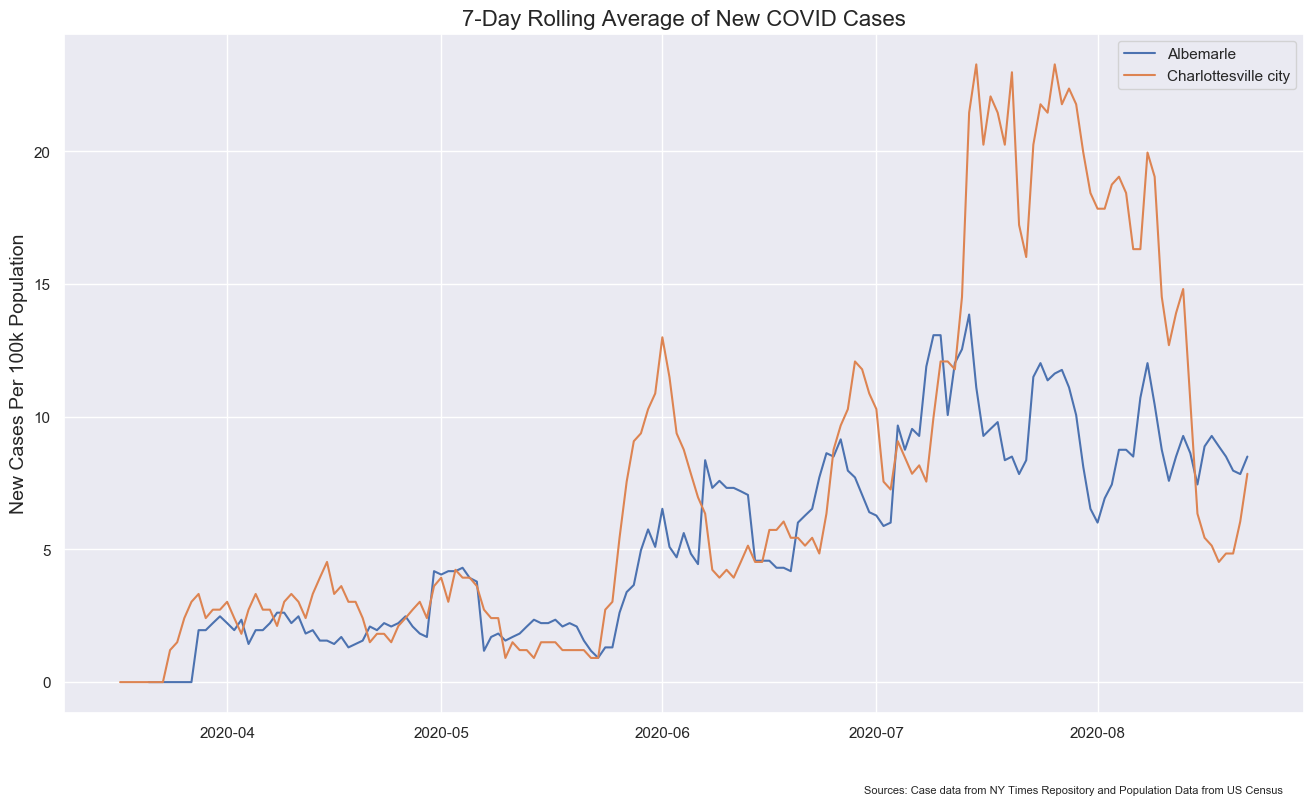

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')